In [1]:
!kaggle datasets download -d techsash/waste-classification-data


Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
100% 427M/427M [00:20<00:00, 23.5MB/s]
100% 427M/427M [00:20<00:00, 22.3MB/s]


In [4]:
!unzip waste-classification-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [5]:
import os
import numpy  as np
import warnings
warnings.filterwarnings("ignore")

import random
from random import seed
from PIL import Image
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Plot of random images from the dataset

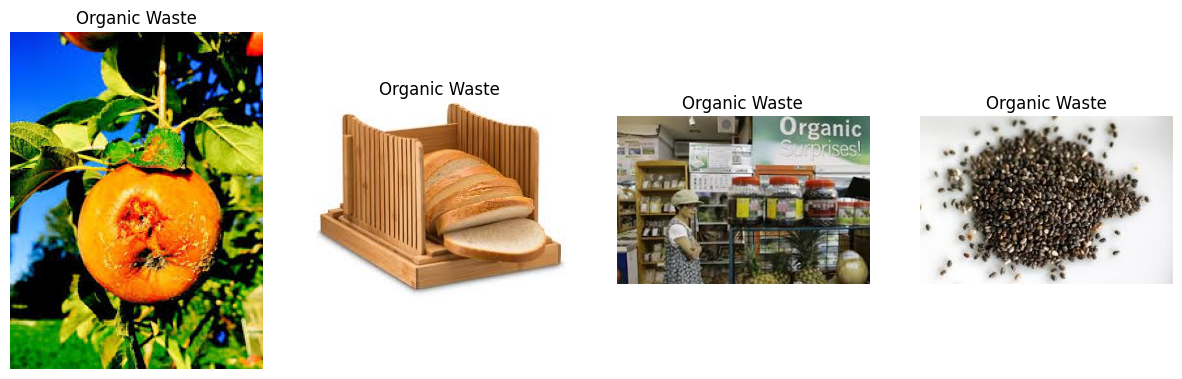

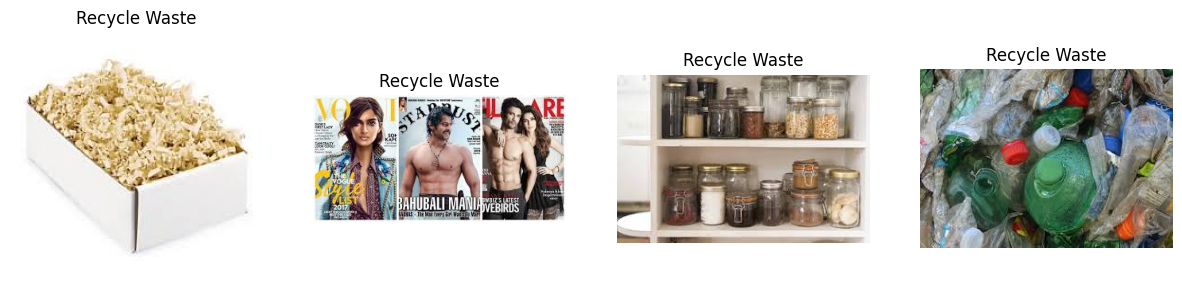

In [8]:
def plot_random_images(dataset_dir, category, num_images=4):
    # Path to the specified category directory
    category_dir = os.path.join(dataset_dir, 'TRAIN', category)

    # Get the list of image file names in the category directory
    image_files = os.listdir(category_dir)

    # Select num_images random images from the category directory
    random_images = random.sample(image_files, num_images)

    # Plot the random images
    plt.figure(figsize=(15, 5))
    for i, image_name in enumerate(random_images):
        # Load the image
        image_path = os.path.join(category_dir, image_name)
        image = Image.open(image_path)

        # Plot the image
        plt.subplot(1, num_images, i+1)
        plt.imshow(image)
        plt.title(("Organic" if category == 'O' else "Recycle") + " Waste")  # Set the title for each image
        plt.axis('off')

    plt.show()

# Example usage: plot 4 random images from 'O' (Organic) and 'R' (Recyclable) categories
dataset_dir = './DATASET'
plot_random_images(dataset_dir, 'O', num_images=4)
plot_random_images(dataset_dir, 'R', num_images=4)

In [9]:
train_directory = './DATASET/TRAIN'
test_directory = './DATASET/TEST'

In [10]:
train_data_generator = ImageDataGenerator(
    #rescale=1./255,
    preprocessing_function=preprocess_input,
    validation_split=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

validation_data_generator = ImageDataGenerator(
    #rescale=1./255,
    preprocessing_function=preprocess_input,
    validation_split=0.2,
)

test_data_generator = ImageDataGenerator(
    #rescale = 1./255,
    preprocessing_function=preprocess_input
)

In [11]:
train_generator = train_data_generator.flow_from_directory(
    train_directory,
    target_size=(150,150),
    class_mode='binary',
    batch_size=128,
    shuffle = True,
    subset="training",
    seed = 43
)

Found 18052 images belonging to 2 classes.


In [12]:
validation_generator = validation_data_generator.flow_from_directory(
    train_directory,
    target_size=(150,150),
    class_mode='binary',
    batch_size=128,
    shuffle = True,
    subset="validation",
    seed = 43
)

Found 4512 images belonging to 2 classes.


In [13]:
test_generator = test_data_generator.flow_from_directory(
    test_directory,
    target_size=(150,150),
    class_mode='binary',
    batch_size=128,
    shuffle = True
)

Found 2513 images belonging to 2 classes.


In [14]:
# Define the core VGG16 model with pre-trained weights
core = VGG16(include_top=False, weights='imagenet', input_shape=(150, 150, 3))
core.trainable = False

# Define the sequential model
model = Sequential([
    core,
    Flatten(),
    Dense(100, activation="relu"),
    Dropout(0.2),
    Dense(50, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=["accuracy"])

# Define early stopping callback
earlystopping = EarlyStopping(monitor='val_accuracy', mode='max', patience=5, restore_best_weights=True)

# Define model checkpoint callback based on validation accuracy
checkpoint_path = "model_checkpoint.keras"
checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

# Train the model
history = model.fit(train_generator, epochs=15, validation_data=validation_generator, callbacks=[earlystopping, checkpoint])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.8243 - loss: 1.0642
Epoch 1: val_accuracy improved from -inf to 0.91999, saving model to model_checkpoint.keras
142/142 ━━━━━━━━━━━━━━━━━━━━ 162s 944ms/step - accuracy: 0.8245 - loss: 1.0611 - val_accuracy: 0.9200 - val_loss: 0.2412
Epoch 2/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.8937 - loss: 0.3022
Epoch 2: val_accuracy did not improve from 0.91999
142/142 ━━━━━━━━━━━━━━━━━━━━ 126s 853ms/step - accuracy: 0.8937 - loss: 0.3021 - val_accuracy: 0.9138 - val_loss: 0.2168
Epoch 3/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 788ms/step - accuracy: 0.9003 - loss: 0.2519
Epoch 3: val_accuracy improved from 0.91999 to 0.93351, saving model to model_checkpoint.keras
142/142 ━━━━━━━━━━━━━━━━━━━━ 142s 858ms/step - accuracy: 0.9003 - loss: 0.2519 - val_accuracy: 0.9335 - val_loss: 0.1929
Epoch 4/15
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 792ms/step - accuracy: 0.9114 - loss: 0.2

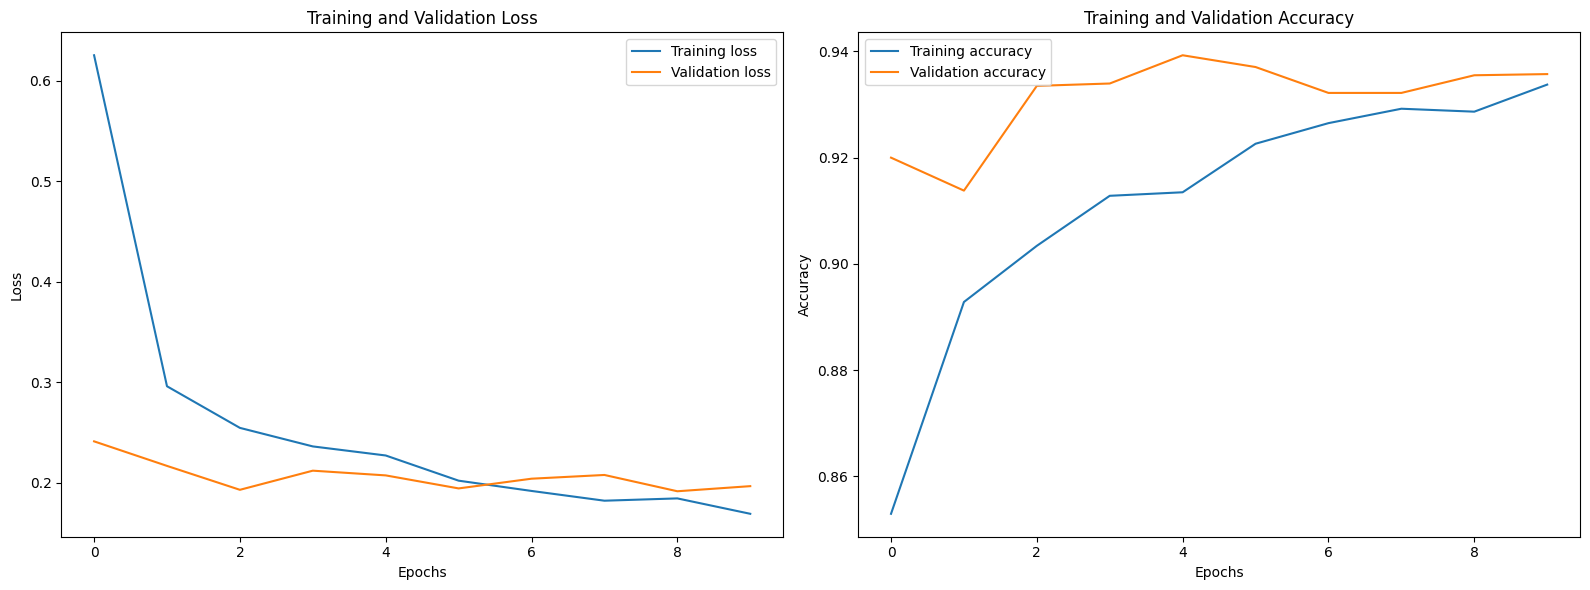

In [15]:
import matplotlib.pyplot as plt

def plot_training_history(history, metrics=['loss', 'accuracy'], figsize=(12, 5)):
    """
    Plot training and validation metrics over epochs.

    Parameters:
        history (History): History object returned by model.fit().
        metrics (list): List of metrics to plot (e.g., ['loss', 'accuracy']).
        figsize (tuple): Figure size (width, height) in inches.

    Returns:
        None
    """
    # Create subplots based on the number of metrics
    num_metrics = len(metrics)
    plt.figure(figsize=figsize)

    for i, metric in enumerate(metrics, 1):
        plt.subplot(1, num_metrics, i)
        plt.plot(history.epoch, history.history[metric], label='Training ' + metric)
        plt.plot(history.epoch, history.history['val_' + metric], label='Validation ' + metric)
        plt.title('Training and Validation ' + metric.capitalize())
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.legend()

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming 'history' contains the training history object
plot_training_history(history, metrics=['loss', 'accuracy'], figsize=(16, 6))


In [16]:
evaluation = model.evaluate(test_generator)
print(f'test Loss: {evaluation[0]:.4f}')
print(f'test Accuracy: {evaluation[1] * 100:.2f}%')

20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 992ms/step - accuracy: 0.8981 - loss: 0.3226
test Loss: 0.2992
test Accuracy: 89.93%


In [17]:
# Save the trained model in HDF5 format
model.save('binary_classification_model.h5')
print("Model saved as 'binary_classification_model.h5'")


Model saved as 'binary_classification_model.h5'


In [31]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Function to preprocess and predict a single image
def predict_image(model_path, image_path, target_size=(150, 150)):
    """
    Predict the class of a single image using a trained model.

    Parameters:
        model_path (str): Path to the saved model file.
        image_path (str): Path to the image file for prediction.
        target_size (tuple): Target size to resize the image.

    Returns:
        dict: Prediction results containing class and probability.
    """
    # Load the model
    model = load_model(model_path)

    # Load and preprocess the image
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image)  # Convert image to numpy array
    image_array = preprocess_input(image_array)  # Use preprocessing function
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    # Predict the class
    prediction = model.predict(image_array)[0][0]
    probability = prediction
    predicted_class = 'Class 1' if prediction > 0.5 else 'Class 0'

    return {"class": predicted_class, "probability": probability}

# Example usage
image_path = '/content/DATASET/TEST/O/O_12571.jpg'  # Replace with your image path
model_path = 'binary_classification_model.h5'
result = predict_image(model_path, image_path)

print(f"Predicted Class: {result['class']}")
print(f"Probability: {result['probability']:.2f}")
if result['class']=='Class 0':
  print("Organic")
else:
  print('Recyclable')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
Predicted Class: Class 0
Probability: 0.00
Organic
